In [1]:
#package prince https://github.com/MaxHalford/prince
#MCA multiple correspondance analysis
#three or more categorical features

In [2]:
#Importing the necessary package
import pandas as pd
import numpy as np
from prince import MCA#Dataset preparation with only numerical features
df = pd.read_csv('AASER_11CDR.csv')
print(len(df))
print(len(df.columns))
df

11
19


,CDR_name,com,dem,rest,Java,api,gui,flat,gdl,form,aql,term,open,archet,temp,fi,fe,extr,oauth2
0,EHRBase,no,no,yes,yes,yes,yes,yes,no,no,yes,no,yes,no,no,dev,dev,no,yes
1,Better,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,dev,yes,no,yes
2,Base24,yes,yes,no,no,no,yes,no,no,yes,no,yes,no,no,no,yes,yes,no,yes
3,Cabo,no,no,yes,no,dev,yes,no,no,no,no,no,yes,no,no,ext,ext,no,no
4,ArenaEHR,yes,no,yes,no,yes,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,none,yes
5,eWeave,yes,yes,no,no,no,yes,no,no,yes,yes,yes,no,no,yes,no,no,no,no
6,EHRCare,yes,yes,yes,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,no,no
7,Clever,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,yes,no,no,yes,yes
8,EHRDB,yes,no,yes,yes,yes,yes,yes,no,yes,yes,no,no,no,no,dev,dev,dev,yes
9,RHP,yes,yes,yes,yes,no,yes,yes,no,yes,no,yes,no,yes,yes,no,no,no,no


In [3]:
df=df.set_index('CDR_name')
df

,com,dem,rest,Java,api,gui,flat,gdl,form,aql,term,open,archet,temp,fi,fe,extr,oauth2
CDR_name,,,,,,,,,,,,,,,,,,
EHRBase,no,no,yes,yes,yes,yes,yes,no,no,yes,no,yes,no,no,dev,dev,no,yes
Better,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,dev,yes,no,yes
Base24,yes,yes,no,no,no,yes,no,no,yes,no,yes,no,no,no,yes,yes,no,yes
Cabo,no,no,yes,no,dev,yes,no,no,no,no,no,yes,no,no,ext,ext,no,no
ArenaEHR,yes,no,yes,no,yes,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,none,yes
eWeave,yes,yes,no,no,no,yes,no,no,yes,yes,yes,no,no,yes,no,no,no,no
EHRCare,yes,yes,yes,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,no,no
Clever,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,yes,no,no,yes,yes
EHRDB,yes,no,yes,yes,yes,yes,yes,no,yes,yes,no,no,no,no,dev,dev,dev,yes


In [4]:
df3=df.replace({'dev':'yes','none':'no','ext':'e'})
df3.replace({'no':'n','yes':'y','ext':'e'})

,com,dem,rest,Java,api,gui,flat,gdl,form,aql,term,open,archet,temp,fi,fe,extr,oauth2
CDR_name,,,,,,,,,,,,,,,,,,
EHRBase,n,n,y,y,y,y,y,n,n,y,n,y,n,n,y,y,n,y
Better,y,n,y,y,y,y,y,y,y,y,y,n,y,y,y,y,n,y
Base24,y,y,n,n,n,y,n,n,y,n,y,n,n,n,y,y,n,y
Cabo,n,n,y,n,y,y,n,n,n,n,n,y,n,n,e,e,n,n
ArenaEHR,y,n,y,n,y,y,y,y,y,y,y,n,n,n,y,y,n,y
eWeave,y,y,n,n,n,y,n,n,y,y,y,n,n,y,n,n,n,n
EHRCare,y,y,y,y,n,n,y,n,y,y,n,n,n,n,n,n,n,n
Clever,y,y,y,y,n,y,y,y,y,y,n,n,y,y,n,n,y,y
EHRDB,y,n,y,y,y,y,y,n,y,y,n,n,n,n,y,y,y,y


In [5]:
#replace all dev with yes
df.replace("dev","yes",inplace=True)
df.replace("none","no",inplace=True)
df.replace("no","n",inplace=True)
df.replace("yes","y",inplace=True)
df.replace("ext","e",inplace=True)
df

,com,dem,rest,Java,api,gui,flat,gdl,form,aql,term,open,archet,temp,fi,fe,extr,oauth2
CDR_name,,,,,,,,,,,,,,,,,,
EHRBase,n,n,y,y,y,y,y,n,n,y,n,y,n,n,y,y,n,y
Better,y,n,y,y,y,y,y,y,y,y,y,n,y,y,y,y,n,y
Base24,y,y,n,n,n,y,n,n,y,n,y,n,n,n,y,y,n,y
Cabo,n,n,y,n,y,y,n,n,n,n,n,y,n,n,e,e,n,n
ArenaEHR,y,n,y,n,y,y,y,y,y,y,y,n,n,n,y,y,n,y
eWeave,y,y,n,n,n,y,n,n,y,y,y,n,n,y,n,n,n,n
EHRCare,y,y,y,y,n,n,y,n,y,y,n,n,n,n,n,n,n,n
Clever,y,y,y,y,n,y,y,y,y,y,n,n,y,y,n,n,y,y
EHRDB,y,n,y,y,y,y,y,n,y,y,n,n,n,n,y,y,y,y


In [6]:
df.drop(['Java','term','archet','temp','extr','gdl','oauth2'],axis=1, inplace = True)
df

,com,dem,rest,api,gui,flat,form,aql,open,fi,fe
CDR_name,,,,,,,,,,,
EHRBase,n,n,y,y,y,y,n,y,y,y,y
Better,y,n,y,y,y,y,y,y,n,y,y
Base24,y,y,n,n,y,n,y,n,n,y,y
Cabo,n,n,y,y,y,n,n,n,y,e,e
ArenaEHR,y,n,y,y,y,y,y,y,n,y,y
eWeave,y,y,n,n,y,n,y,y,n,n,n
EHRCare,y,y,y,n,n,y,y,y,n,n,n
Clever,y,y,y,n,y,y,y,y,n,n,n
EHRDB,y,n,y,y,y,y,y,y,n,y,y


In [7]:
df.to_csv('input.csv')

In [568]:
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1
EHRBase,0.964511,-0.384791
Better,0.065072,-0.656480
Base24,-0.267734,0.412437
Cabo,1.686646,0.882755
ArenaEHR,0.065072,-0.656480
eWeave,-0.618756,0.650747
EHRCare,-0.736238,0.285389
Clever,-0.586371,0.191964
EHRDB,0.065072,-0.656480
RHP,-0.509214,0.426850


In [569]:
mca.explained_inertia_ #variance explained

[0.41568284407988304, 0.2584786474008659]

In [570]:
round(sum(mca.explained_inertia_)*100,1)

67.4

In [571]:
 mca.eigenvalues_

[0.49126154300349817, 0.30547476511011423]

In [572]:
mca.column_coordinates(df)

,0,1
com_n,1.891251,0.450485
com_y,-0.420278,-0.100108
dem_n,0.646386,-0.593268
dem_y,-0.775663,0.711922
rest_n,-0.632394,0.961814
rest_y,0.140532,-0.213736
api_n,-0.676837,0.443725
api_y,0.812205,-0.532470
gui_n,-1.050417,0.516356
gui_y,0.105042,-0.051636


<IPython.core.display.Javascript object>


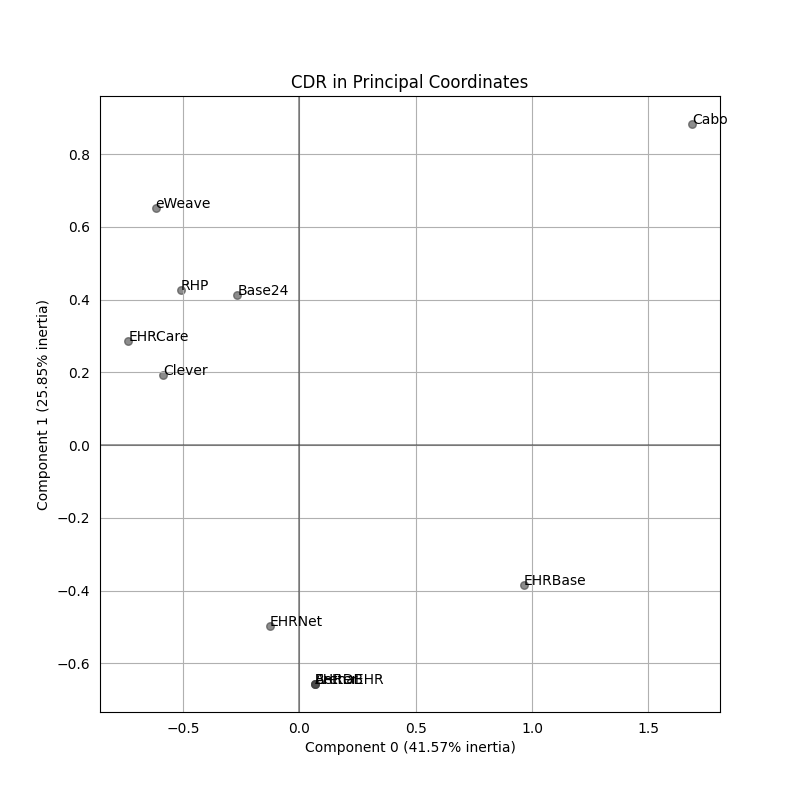

In [573]:
#The result is like the PCA or CA result, two principal components with SVD result as the values. Just like previous techniques, we could plot the coordinates into a two-dimension graph.
mca.column_coordinates(df)
ax=mca.plot_coordinates(X =df,figsize=(8,8),show_row_points=True,show_row_labels=True, 
                     show_column_points=False, show_column_labels=False,
                    row_points_size=30, column_points_size=30)

In [574]:
ax.set_title('CDR in Principal Coordinates')

Text(0.5, 1.0, 'CDR in Principal Coordinates')

In [575]:
ax.get_figure().savefig('mca_coordinates_11cdr.svg')
ax.get_figure().savefig('mca_coordinates_11cdr.png')

In [576]:
mca = MCA(n_components = 3, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1,2
EHRBase,0.964511,-0.384791,-0.242599
Better,0.065072,-0.656480,0.094008
Base24,-0.267734,0.412437,0.948881
Cabo,1.686646,0.882755,-0.111395
ArenaEHR,0.065072,-0.656480,0.094008
eWeave,-0.618756,0.650747,0.350136
EHRCare,-0.736238,0.285389,-0.800813
Clever,-0.586371,0.191964,-0.343925
EHRDB,0.065072,-0.656480,0.094008
RHP,-0.509214,0.426850,-0.190005


In [577]:
print(df_mca.iloc[0,2])
index=df_mca.index
print(index[0])

-0.24259857398808438
EHRBase


In [578]:
mca.explained_inertia_ #variance explained

[0.41568284407988343, 0.2584786474008658, 0.14831007260136259]

In [579]:
round(sum(mca.explained_inertia_)*100,1)

82.2

In [580]:
 mca.eigenvalues_

[0.4912615430034986, 0.3054747651101141, 0.17527554034706488]

In [581]:
mca.column_coordinates(df)

,0,1,2
com_n,1.891251,0.450485,-0.422771
com_y,-0.420278,-0.100108,0.093949
dem_n,0.646386,-0.593268,0.014222
dem_y,-0.775663,0.711922,-0.017067
rest_n,-0.632394,0.961814,1.551401
rest_y,0.140532,-0.213736,-0.344756
api_n,-0.676837,0.443725,0.028651
api_y,0.812205,-0.532470,-0.034381
gui_n,-1.050417,0.516356,-1.912803
gui_y,0.105042,-0.051636,0.191280


<IPython.core.display.Javascript object>


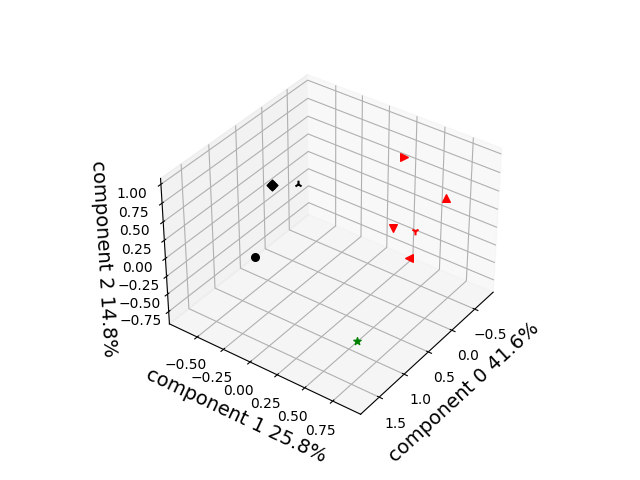

In [583]:
%matplotlib notebook
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


from matplotlib import interactive,pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

 
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets
 
fig = figure()
ax = fig.add_subplot(projection='3d')
labels=['EHRBase', 'Better', 'Base24', 'Cabo', 'ArenaEHR', 'eWeave', 'EHRCare','Clever', 'EHRDB','RHP','EHRNet']
colors=['black', 'black', 'red','green', 'black','red','red','red','black','red','black']
markers=['o','p','>','*','H','^','<','v','D','1','2']
pippo=['EHRBase', 'Better,ArenaEHR,EHRDB', 'Base24', 'Cabo', 'Better,ArenaEHR,EHRDB', 'eWeave', 'EHRCare','Clever', 'Better,ArenaEHR,EHRDB','RHP','EHRNet']

for i in range(len(df_mca)): #plot each point + its index as text above
    ax.scatter(df_mca.iloc[i,0],df_mca.iloc[i,1],df_mca.iloc[i,2],color=colors[i],marker=markers[i],s=30,label=labels[i])

ax.set_xlabel(f'component 0 {round(mca.explained_inertia_[0]*100,1)}%', fontsize=14)
ax.set_ylabel(f'component 1 {round(mca.explained_inertia_[1]*100,1)}%', fontsize=14)
ax.set_zlabel(f'component 2 {round(mca.explained_inertia_[2]*100,1)}%', fontsize=14)

plt.show()







In [584]:
ax.get_figure().savefig('3d_mca_coordinates_11cdr_t.svg')
ax.get_figure().savefig('3d_mca_coordinates_11cdr_t.png')

In [556]:
df_mca.index

Index(['EHRBase', 'Better', 'Base24', 'Cabo', 'ArenaEHR', 'eWeave', 'EHRCare',
       'Clever', 'EHRDB', 'RHP', 'EHRNet'],
      dtype='object')

In [557]:
mca.explained_inertia_

[0.41568284407988343, 0.2584786474008658, 0.14831007260136259]

In [558]:
df2_mca=df_mca.reindex(['Base24','eWeave','EHRCare','Clever','RHP','Cabo','EHRBase','ArenaEHR','Better','EHRDB','EHRNet'])
df2_mca

,0,1,2
Base24,-0.267734,0.412437,0.948881
eWeave,-0.618756,0.650747,0.350136
EHRCare,-0.736238,0.285389,-0.800813
Clever,-0.586371,0.191964,-0.343925
RHP,-0.509214,0.426850,-0.190005
Cabo,1.686646,0.882755,-0.111395
EHRBase,0.964511,-0.384791,-0.242599
ArenaEHR,0.065072,-0.656480,0.094008
Better,0.065072,-0.656480,0.094008
EHRDB,0.065072,-0.656480,0.094008


In [559]:
symbols=['triangle-right','triangle-up','triangle-left','triangle-down','1','star','circle','circle-x','circle-cross','circle-cross-open','circle-dot']
s=dict(zip(df2_mca.index,symbols))
colors=['red', 'red', 'red','red', 'red','green','black','black','black','black','black']
c=dict(zip(df2_mca.index,colors))
for i,ss in enumerate(s):
    print(ss,s[ss],c[ss])


Base24 triangle-right red
eWeave triangle-up red
EHRCare triangle-left red
Clever triangle-down red
RHP 1 red
Cabo star green
EHRBase circle black
ArenaEHR circle-x black
Better circle-cross black
EHRDB circle-cross-open black
EHRNet circle-dot black


In [309]:
df_mca

,0,1,2
EHRBase,0.944200,-0.397299,-0.217138
Better,0.091081,-0.680729,0.034501
Base24,-0.247969,0.187577,0.999693
Cabo,1.574615,0.981279,-0.059103
ArenaEHR,0.091081,-0.680729,0.034501
eWeave,-0.620275,0.637505,0.373042
EHRCare,-0.730518,0.401874,-0.756321
Clever,-0.553912,0.073379,-0.221952
EHRDB,0.091081,-0.680729,0.034501
RHP,-0.513183,0.485590,-0.166703


In [560]:
import plotly.express as px

labels = {
    str(i): f'Comp {str(i+1)} {round(var*100,1)}%'
    for i, var in enumerate(mca.explained_inertia_)
}

fig = px.scatter_matrix(
    df2_mca,
    labels=labels,
    dimensions=range(3),
    color=df2_mca.index,
    color_discrete_map=c,
    symbol=df2_mca.index,
    symbol_map=s,
    height=800, width=800,
    size=[15]*11,size_max=12
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [561]:
fig.write_image('scatterplot3dcomponents_11CDR.svg')
fig.write_image('scatterplot3dcomponents_11CDR.png')

In [562]:
df2=df.reindex(['Base24','eWeave','EHRCare','Clever','RHP','Cabo','EHRBase','ArenaEHR','Better','EHRDB','EHRNet'])
df2

,com,dem,rest,api,gui,flat,form,aql,open,fi,fe
CDR_name,,,,,,,,,,,
Base24,y,y,n,n,y,n,y,n,n,y,y
eWeave,y,y,n,n,y,n,y,y,n,n,n
EHRCare,y,y,y,n,n,y,y,y,n,n,n
Clever,y,y,y,n,y,y,y,y,n,n,n
RHP,y,y,y,n,y,y,y,n,n,n,n
Cabo,n,n,y,y,y,n,n,n,y,e,e
EHRBase,n,n,y,y,y,y,n,y,y,y,y
ArenaEHR,y,n,y,y,y,y,y,y,n,y,y
Better,y,n,y,y,y,y,y,y,n,y,y
